In [5]:
import cn2an
from opencc import OpenCC
import nltk
from nltk import ngrams
cc = OpenCC('t2s')

import csv
from jiwer import wer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from suta import *
exp_name = f'./ex_data/suta_s2t_onlyeos0610'

In [6]:
def remove_duplicate_part(sentence):
    # Tokenize the sentence
    n=4
    words = nltk.word_tokenize(sentence)
    
    # Generate n-grams
    n_grams = list(ngrams(words, n))
    
    # Create a dictionary to count the occurrences of each n-gram
    n_gram_counts = {}
    for i, gram in enumerate(n_grams):
        if gram in n_gram_counts:
            n_gram_counts[gram].append(i)
        else:
            n_gram_counts[gram] = [i]
    
    # Find the first duplicate n-gram
    duplicate_start = None
    for gram, indices in n_gram_counts.items():
        if len(indices) > 1:
            duplicate_start = indices[0]
            break
    
    # If no duplicate is found, return the original sentence
    if duplicate_start is None:
        return sentence
    
    # Reconstruct the sentence without the duplicate part
    new_sentence = words[:duplicate_start + n]
    
    return ' '.join(new_sentence)

In [9]:
import re
import numpy as np
# 開啟文件
with open(f'{exp_name}/log.txt', 'r') as file:
    # 讀取文件所有行
    lines = file.readlines()

# 初始化兩個列表
ori_wers = []
wer_1 = []
wer_3 = []
wer_5 = []
wer_10 = []
wer_13 = []
wer_15 = []
wer_18 = []
wer_20 = []
ori_transcription = []
transcriptions_1 = []
transcriptions_3 = []
transcriptions_5 = []
transcriptions_10 = []
transcriptions_13 = []
transcriptions_15 = []
transcriptions_18 = []
transcriptions_20 = []
labels = []
# 遍歷每一行
for line in lines:
    # if len(labels) == 20:
    #     continue
    # if len(labels) == 50:
    #     break
    # 刪除每行開頭和結尾的空白字符
    line = line.strip()
    # 使用":"分割該行，取第二部分作為句子
    try:
        sentence = line.split(':')[1]
    except:
        continue
    # 如果該行以"ori"開頭
    if line.startswith('ori'):
        # 使用":"分割該行，取第二部分作為ori的值
        match = re.search(r'\((.*?)\)', (line.split(':')[0]))
        ori_wer = float(match.group(1))
        # 將ori的值添加到ori_wers列表中
        ori_wers.append(ori_wer)
        ori_transcription.append(sentence)
    # 如果該行以"label"開頭
    elif line.startswith('label'):
        labels.append(line.split(':')[1])
    elif line.startswith('step0'):
        # 使用":"分割該行，取第二部分作為ori的值
        match = re.search(r'\((.*?)\)', (line.split(':')[0]))
        ori_value = float(match.group(1))
        # 將ori的值添加到ori_values列表中
        wer_1.append(ori_value)
        sentence = line.split(':')[1]
        transcriptions_1.append(sentence)
    elif line.startswith('step3'):
        # 使用":"分割該行，取第二部分作為ori的值
        match = re.search(r'\((.*?)\)', (line.split(':')[0]))
        ori_value = float(match.group(1))
        # 將ori的值添加到ori_values列表中
        wer_3.append(ori_value)
        sentence = line.split(':')[1]
        transcriptions_3.append(sentence)
    elif line.startswith('step6'):
        # 使用":"分割該行，取第二部分作為ori的值
        match = re.search(r'\((.*?)\)', (line.split(':')[0]))
        ori_value = float(match.group(1))
        # 將ori的值添加到ori_values列表中
        wer_5.append(ori_value)
        sentence = line.split(':')[1]
        transcriptions_5.append(sentence)
    elif line.startswith('step9'):
        # 使用":"分割該行，取第二部分作為ori的值
        match = re.search(r'\((.*?)\)', (line.split(':')[0]))
        ori_value = float(match.group(1))
        # 將ori的值添加到ori_values列表中
        wer_10.append(ori_value)
        sentence = line.split(':')[1]
        transcriptions_10.append(sentence)
    elif line.startswith('step12'):
        # 使用":"分割該行，取第二部分作為ori的值
        match = re.search(r'\((.*?)\)', (line.split(':')[0]))
        ori_value = float(match.group(1))
        # 將ori的值添加到ori_values列表中
        wer_13.append(ori_value)
        sentence = line.split(':')[1]
        transcriptions_13.append(sentence)
    elif line.startswith('step15'):
        # 使用":"分割該行，取第二部分作為ori的值
        match = re.search(r'\((.*?)\)', (line.split(':')[0]))
        ori_value = float(match.group(1))
        # 將ori的值添加到ori_values列表中
        wer_15.append(ori_value)
        sentence = line.split(':')[1]
        transcriptions_15.append(sentence)
    elif line.startswith('step18'):
        # 使用":"分割該行，取第二部分作為ori的值
        match = re.search(r'\((.*?)\)', (line.split(':')[0]))
        ori_value = float(match.group(1))
        # 將ori的值添加到ori_values列表中
        wer_18.append(ori_value)
        sentence = line.split(':')[1]
        transcriptions_18.append(sentence)
    elif line.startswith('step19'):
        # 使用":"分割該行，取第二部分作為ori的值
        match = re.search(r'\((.*?)\)', (line.split(':')[0]))
        ori_value = float(match.group(1))
        # 將ori的值添加到ori_values列表中
        wer_20.append(ori_value)
        sentence = line.split(':')[1]
        transcriptions_20.append(sentence)

In [10]:
print(f'{np.array(ori_wers).mean() * 100}')
print(f'{np.array(wer_1).mean() * 100}')
print(f'{np.array(wer_3).mean() * 100}')
print(f'{np.array(wer_5).mean() * 100}')
print(f'{np.array(wer_10).mean() * 100}')
print(f'{np.array(wer_13).mean() * 100}')
print(f'{np.array(wer_15).mean() * 100}')
print(f'{np.array(wer_18).mean() * 100}')
print(f'{np.array(wer_20).mean() * 100}')

15.151653735651657
14.605329521047993
13.893784519606802
13.802419891853823
13.759400538115834
13.70433676377168
13.831131032280778
13.976564080081838
14.062906309281209


In [44]:
print(wer(labels, ori_transcription))
print(wer(labels, transcriptions_1))
print(wer(labels, transcriptions_3))
print(wer(labels, transcriptions_5))
print(wer(labels, transcriptions_10))
print(wer(labels, transcriptions_13))
print(wer(labels, transcriptions_15))
print(wer(labels, transcriptions_18))
print(wer(labels, transcriptions_20))

0.16058643027616776
0.1759290828503239
0.17286055233549266
0.18002045687009888
0.17337197408796454
0.1801909307875895
0.19314694851687692
0.20695533583361744
0.21616092737811116


In [45]:
print(wer(labels, list(map(remove_duplicate_part, ori_transcription))))
print(wer(labels, list(map(remove_duplicate_part,transcriptions_1))))
print(wer(labels, list(map(remove_duplicate_part,transcriptions_3))))
print(wer(labels, list(map(remove_duplicate_part,transcriptions_5))))
print(wer(labels, list(map(remove_duplicate_part,transcriptions_10))))
print(wer(labels, list(map(remove_duplicate_part,transcriptions_13))))
print(wer(labels, list(map(remove_duplicate_part,transcriptions_15))))
print(wer(labels, list(map(remove_duplicate_part,transcriptions_18))))
print(wer(labels, list(map(remove_duplicate_part,transcriptions_20))))

0.18104330037504263
0.18377088305489261
0.18547562222979885
0.19979543129901126
0.21172860552335493
0.2165018752130924
0.21922945789294238
0.2371292192294579
0.239345380156836


In [4]:
best_wers = [min(wer_1[i], wer_3[i],wer_5[i],wer_10[i],wer_13[i],wer_15[i],wer_18[i],wer_20[i]) for i in range(len(wer_1))]
print(np.array(best_wers).mean() * 100)

13.206829768257341


In [5]:
step_wers = [(wer_1[i], wer_3[i],wer_5[i],wer_10[i],wer_13[i],wer_15[i],wer_18[i],wer_20[i]) for i in range(len(wer_1))]
best_wer_index = [step_wers[i].index(best_wers[i]) for i in range(len(wer_1))]
idx_sum = 0
for idx in best_wer_index:
    if idx == 0:
        idx_sum+=1
    elif idx == 2:
        idx_sum+=7
    elif idx == 1:
        idx_sum+=4
    elif idx == 3:
        idx_sum+=10
    elif idx == 6:
        idx_sum+=18

idx_sum/len(wer_1)

2.020408163265306

In [13]:
idx_sum = 0
for idx in best_wer_index:
    if idx == 0:
        idx_sum+=1
    elif idx == 2:
        idx_sum+=7
    elif idx == 1:
        idx_sum+=4
    elif idx == 3:
        idx_sum+=10
    elif idx == 6:
        idx_sum+=18

idx_sum/len(wer_1)


2.816326530612245

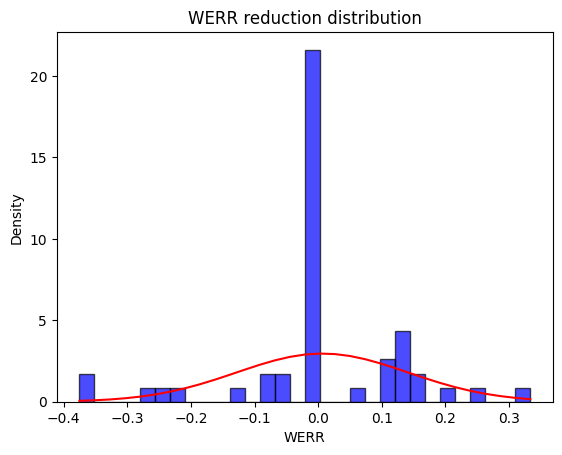

0.006483961398032287

In [50]:
import matplotlib.pyplot as plt
import numpy as np
from whisper.normalizers import EnglishTextNormalizer
normalizer = EnglishTextNormalizer()
werr_list = []
for i in range(len(transcriptions_20)):
    wer_list = wer_10
    try:
        werr = (ori_wers[i] - wer_list[i])/ori_wers[i]
    except:
        if wer_list[i] != 0:
            werr = 1
        else:
            werr = 0
    werr_list.append(werr)
    if werr < -0.5:
        print(normalizer(sentences[i]))
        print(normalizer(transcriptions_10[i]))

# 绘制直方图
plt.hist(werr_list, bins=30, density=True, alpha=0.7, color='blue', edgecolor='black')
plt.title('WERR reduction distribution')
plt.xlabel('WERR')
plt.ylabel('Density')

# # 绘制密度估计图
werr_list = np.array(werr_list)
density, bins, _ = plt.hist(werr_list, bins=30, density=True, alpha=0)
plt.plot(bins, 1/(np.sqrt(2*np.pi)*np.std(werr_list)) * np.exp(-0.5*(bins-np.mean(werr_list))**2/np.var(werr_list)), color='red')
plt.title('WERR reduction distribution')
plt.xlabel('WERR')
plt.ylabel('Density')
plt.show()

werr_list.mean()


In [68]:
from whisper.normalizers import EnglishTextNormalizer
import jiwer
normalizer = EnglishTextNormalizer()

def find_different_words(sentence1, sentence2):
    # 分解句子为单词列表
    words1 = set(normalizer(sentence1).split())
    words2 = set(normalizer(sentence2).split())
    
    # 找出不同的单词
    different_words = words2 - words1
    original_words = words1 - words2
    return original_words, different_words

subs = []
inss = []
dels = []
with open('./err_analysis.txt', 'w' ) as f:
    for i in range(len(ori_transcription)):
        result = jiwer.compute_measures(normalizer(ori_transcription[i]), normalizer(transcriptions_20[i]))
        # 打印结果
        print("WERR:", jiwer.wer(normalizer(sentences[i]), normalizer(ori_transcription[i])) - jiwer.wer(normalizer(sentences[i]), normalizer(transcriptions_10[i])), file=f)  # WER表示单词错误率
        print("Substitutions:", result['substitutions'], file=f)  # 替换的单词列表
        print("Insertions:", result['insertions'], file=f)  # 插入的单词列表
        print("Deletions:", result['deletions'], file=f)  # 删除的单词列表
        print(f"label:{sentences[i]}", file=f)
        print(f"original_sentence:{ori_transcription[i]}", file=f)
        print(f"adapted_sentence:{transcriptions_20[i]}", file=f)
        subs.append(result['substitutions'])
        inss.append(result['insertions'])
        dels.append(result['deletions'])
        # print("Ref:", result['alignment']['true'])  # 参考文本中的单词列表
        # print("Hyp:", result['alignment']['pred'])  # 预测文本中的单词列表
        # f.write(sentences[i]+'\n')
        # f.write(normalizer(ori_transcription[i])+'\n')
        # f.write(normalizer(transcriptions_10[i])+'\n')
        f.write('original wrong words:'+str(find_different_words(normalizer(sentences[i]), normalizer(ori_transcription[i])))+'\n')
        f.write('adapt words:'+str(find_different_words(normalizer(ori_transcription[i]), normalizer(transcriptions_20[i])))+'\n')
        f.write('=======================================\n')

In [69]:
print(np.array(subs).mean())
print(np.array(inss).mean())
print(np.array(dels).mean())

3.877551020408163
0.5306122448979592
0.46938775510204084


In [5]:
data = pd.read_csv('./ex_data/csv/tiny.en_librispeech_2.5_noise_0.01_lr_2e-05_EMcoef_0.3_encoderOnly_None_decoderOnly_decoderOnly_topk_30_beam_2.csv')

In [7]:
from whisper.normalizers import EnglishTextNormalizer
import jiwer
normalizer = EnglishTextNormalizer()

data["before_adapt_clean"] = [normalizer(text) for text in data["before_adapt"]]
data["step1_clean"] = [normalizer(text) for text in data["step1"]]
data["step3_clean"] = [normalizer(text) for text in data["step3"]]
data["step5_clean"] = [normalizer(text) for text in data["step5"]]
data["step10_clean"] = [normalizer(text) for text in data["step10"]]
data["reference_clean"] = [normalizer(text) for text in data["reference"]]

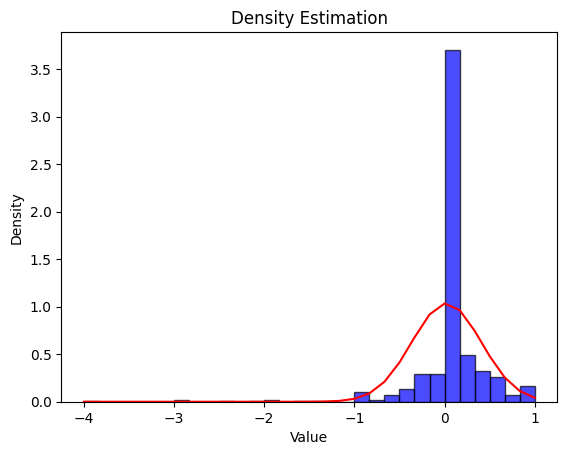

In [23]:
import matplotlib.pyplot as plt
import numpy as np
werr_list = []
for i in range(len(data['step10_clean'])):
    ori_wer = jiwer.wer(data['reference_clean'][i], data['before_adapt_clean'][i])
    adapt_wer = jiwer.wer(data['reference_clean'][i], data['step10_clean'][i])
    try:
        werr = (ori_wer - adapt_wer)/ori_wer
    except:
        if adapt_wer != 0:
            werr = 1
        else:
            werr = 0
    werr_list.append(werr)

# 绘制直方图
plt.hist(werr_list, bins=30, density=True, alpha=0.7, color='blue', edgecolor='black')
plt.title('Histogram')
plt.xlabel('Value')
plt.ylabel('Frequency')

# 绘制密度估计图
werr_list = np.array(werr_list)
density, bins, _ = plt.hist(werr_list, bins=30, density=True, alpha=0)
plt.plot(bins, 1/(np.sqrt(2*np.pi)*np.std(werr_list)) * np.exp(-0.5*(bins-np.mean(werr_list))**2/np.var(werr_list)), color='red')
plt.title('Density Estimation')
plt.xlabel('Value')
plt.ylabel('Density')

plt.show()


In [19]:

data["before_adapt_clean"] = [cn2an.transform(cc.convert(text) ,"an2cn") for count, text in enumerate(data["before_adapt"]) ]
data["step1_clean"] = [cn2an.transform(cc.convert(text) ,"an2cn") for count, text in enumerate(data["step1"]) ]
data["step3_clean"] = [cn2an.transform(cc.convert(text) ,"an2cn") for count, text in enumerate(data["step3"]) ]
data["step5_clean"] = [cn2an.transform(cc.convert(text) ,"an2cn") for count, text in enumerate(data["step5"]) ]
data["step10_clean"] = [cn2an.transform(cc.convert(text) ,"an2cn") for count, text in enumerate(data["step10"]) ]

In [24]:
data = data.drop(data.index[1000:])

In [20]:
wer_list = []
wer_list.append(jiwer.cer(list(data["reference"]), list(data["before_adapt"])))
wer_list.append(jiwer.cer(list(data["reference"]), list(data["step1"])))
wer_list.append(jiwer.cer(list(data["reference"]), list(data["step3"])))
wer_list.append(jiwer.cer(list(data["reference"]), list(data["step5"])))
wer_list.append(jiwer.cer(list(data["reference"]), list(data["step10"])))
wer_list

[0.2832350285533367,
 0.28370407720540813,
 0.2835750888260885,
 0.28351645774457956,
 0.2834695528793724]

In [25]:
wer_list = []
wer_list.append(jiwer.cer(list(data["reference"]), list(data["before_adapt_clean"])))
wer_list.append(jiwer.cer(list(data["reference"]), list(data["step1_clean"])))
wer_list.append(jiwer.cer(list(data["reference"]), list(data["step3_clean"])))
wer_list.append(jiwer.cer(list(data["reference"]), list(data["step5_clean"])))
wer_list.append(jiwer.cer(list(data["reference"]), list(data["step10_clean"])))
wer_list

[0.20610687022900764,
 0.20593138545231202,
 0.20610687022900764,
 0.20593138545231202,
 0.20601912784065982]

In [35]:
jiwer.cer(list(data["reference"]), list(data["hypothesis_clean"]))

0.23161260149199947

In [ ]:
for i in range(5000):
    print(str(i)+':'+tokenizer.decode([i]))